In [ ]:
import yaml
from dnn_models import SincNet, MLP

with open('./sincnet_models/sincnet_timit/sincnet_config.yaml') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

# Converting context and shift in samples
CNN_config = config["CNN"]
window_len = int(CNN_config["fs"] * CNN_config["convolution_window_len"] / 1000.0)
CNN_config.update({"input_dim": window_len})
CNN_net = SincNet(CNN_config)

DNN1_config = config["DNN_1"]
DNN1_config.update({"input_dim": CNN_net.out_dim})
DNN1_net = MLP(DNN1_config)

Load state dict

In [ ]:
import torch

cnn_state_dict = torch.load('./sincnet_models/sincnet_timit/train/cnn_state_dict.pth')
dnn1_state_dict = torch.load('./sincnet_models/sincnet_timit/train/dnn1_state_dict.pth')

CNN_net.load_state_dict(cnn_state_dict)
DNN1_net.load_state_dict(dnn1_state_dict)

/home/loolootech


In [3]:
import numpy as np

vectors = np.load('SincNet/d_vector_timit.npy', allow_pickle=True)


vectors = vectors.item()

embeded_vectors = []
for key, value in vectors.items():
    embeded_vectors.append(value)

FileNotFoundError: [Errno 2] No such file or directory: 'SincNet/d_vector_timit.npy'

In [ ]:
embeded_vectors

In [18]:
# Use kmean to cluster the vectors
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

vector_array = np.array(embeded_vectors)
kmeans = KMeans(n_clusters=3, random_state=0).fit(vector_array)

# plot the clusters


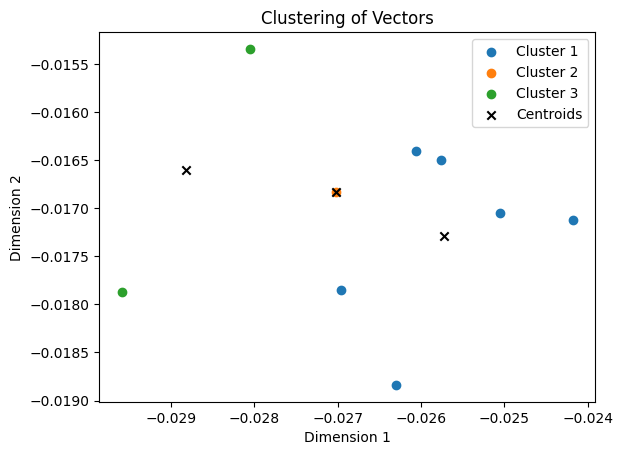

In [19]:
import matplotlib.pyplot as plt

cluster_labels = kmeans.labels_
num_clusters = 3
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the clusters
for i in range(num_clusters):
    # Get the vectors that belong to the current cluster
    cluster_vectors = vector_array[cluster_labels == i]
    
    # Plot the vectors of the current cluster
    plt.scatter(cluster_vectors[:, 0], cluster_vectors[:, 1], label=f'Cluster {i+1}')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', label='Centroids')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustering of Vectors')
plt.legend()
plt.show()
